In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tinyarray
import kwant

from numpy import pi, sin, cos

sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

s_0 = tinyarray.array([[1, 0], [0, 1]])
s_x = tinyarray.array([[0, 1], [1, 0]])
s_y = tinyarray.array([[0, -1j], [1j, 0]])
s_z = tinyarray.array([[1, 0], [0, -1]])

gamma_1 = np.kron(sigma_x, s_z)
gamma_2 = np.kron(-sigma_y, s_0)
gamma_3 = np.kron(sigma_z, s_0)
gamma_4 = np.kron(sigma_x, s_x)
gamma_5 = np.kron(sigma_x, s_y)

R4 = np.exp(1j * pi / 4) * sp.linalg.expm(-1j * pi / 4 * np.kron(2 * sigma_0 - sigma_z, s_z))

C:\Users\mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [35]:
m0 = 1.0
bxy = 1.0
bz = 0.75
g1 = 0.0
g2 = 0.0

def make_system(a=1, kz=0.0, m0=1.0, bxy=1.0, bz=0.75, g1=0.0, g2=0.0, nx=10):
    # Start with an empty tight-binding system and a single square lattice.
    # `a` is the lattice constant (by default set to 1 for simplicity).

    lat = kwant.lattice.square(a)

    syst = kwant.Builder()

    #### Define the scattering region. ####
    # Now, we aim for a more complex shape, namely a ring (or annulus)
    def cut_square(pos):
        (x, y) = pos
        return (0 <= y < nx // 2 and 0 <= x < nx + 1) or (0 <= y < nx and 0 <= x < nx // 2)

    onsite = (m0 - 2 * bxy - bz * (1 - cos(kz))) * gamma_3
    tx = 1j / 2 * gamma_1 + bxy / 2 * gamma_3 + g1 / 2 * sin(kz) * gamma_4
    ty = 1j / 2 * gamma_2 + bxy / 2 * gamma_3 - g1 / 2 * sin(kz) * gamma_4
    txy = -g2 / 4 * sin(kz) * gamma_5

    syst[lat.shape(cut_square, (1, 1))] = onsite
    syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = tx
    syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = ty
    syst[kwant.builder.HoppingKind((1, 1), lat, lat)] = txy
    syst[kwant.builder.HoppingKind((1, -1), lat, lat)] = -txy

    # for ii in range(nx // 2):
        # syst[lat(nx - ii, nx // 2)]

    syst[lat(nx, nx // 2 - 1), lat(nx // 2 - 1, nx - 1)] = tx

    return syst


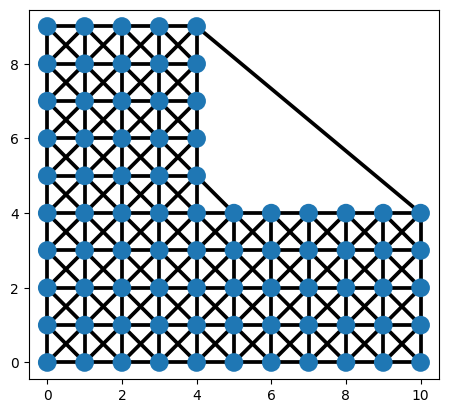

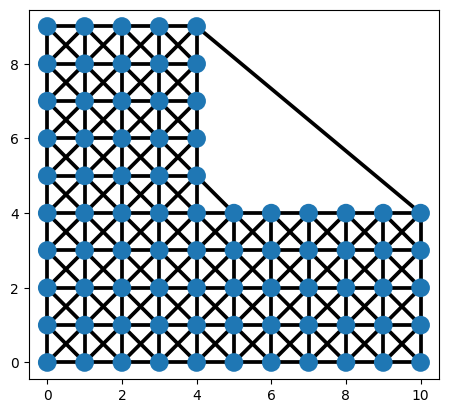

In [36]:
disc_syst = make_system(nx=10)
kwant.plot(disc_syst)

In [11]:
def lei_lat(a: float, m0: float, bxy: float, bz: float, g1: float, g2: float):
    onsite = m0 - 2 * bxy - bz

    # create a simple 2D lattice with vectors a1 and a2
    lattice = pb.Lattice(a1=[a, 0, 0], a2=[0, a, 0], a3=[0, 0, a])

    # mass term
    lattice.add_sublattices(
        ('g', [0, 0, 0], onsite * s0),
        ('u', [0, 0, 0], -onsite * s0)
    )

    # \Gamma_1
    lattice.add_hoppings(
        # (relative_index, from_sublattice, to_sublattice, energy)
        ([1, 0, 0], 'g', 'u', 1j / 2 * sz),
        ([1, 0, 0], 'u', 'g', 1j / 2 * sz)
    )

    # \Gamma_2
    lattice.add_hoppings(
        # (relative_index, from_sublattice, to_sublattice, energy)
        ([0, 1, 0], 'g', 'u', 1 / 2 * s0),
        ([0, 1, 0], 'u', 'g', -1 / 2 * s0)
    )

    # \Gamma_3
    lattice.add_hoppings(
        # (relative_index, from_sublattice, to_sublattice, energy)
        ([1, 0, 0], 'g', 'g', 1 / 2 * bxy * s0),
        ([1, 0, 0], 'u', 'u', -1 / 2 * bxy * s0),
        ([0, 1, 0], 'g', 'g', 1 / 2 * bxy * s0),
        ([0, 1, 0], 'u', 'u', -1 / 2 * bxy * s0),
        ([0, 0, 1], 'g', 'g', 1 / 2 * bz * s0),
        ([0, 0, 1], 'u', 'u', -1 / 2 * bz * s0)
    )

    # \Gamma_4
    lattice.add_hoppings(
        # (relative_index, from_sublattice, to_sublattice, energy)
        ([1, 0, 1], 'g', 'u', 1j / 4 * g1 * sx),
        ([1, 0, 1], 'u', 'g', 1j / 4 * g1 * sx),
        ([1, 0, -1], 'g', 'u', -1j / 4 * g1 * sx),
        ([1, 0, -1], 'u', 'g', -1j / 4 * g1 * sx),
        ([0, 1, 1], 'g', 'u', -1j / 4 * g1 * sx),
        ([0, 1, 1], 'u', 'g', -1j / 4 * g1 * sx),
        ([0, 1, -1], 'g', 'u', 1j / 4 * g1 * sx),
        ([0, 1, -1], 'u', 'g', 1j / 4 * g1 * sx)
    )

    # \Gamma_5
    lattice.add_hoppings(
        # (relative_index, from_sublattice, to_sublattice, energy)
        ([1, 1, 1], 'g', 'u', -1j / 8 * g2 * sy),
        ([1, 1, 1], 'u', 'g', -1j / 8 * g2 * sy),
        ([1, -1, 1], 'g', 'u', 1j / 8 * g2 * sy),
        ([1, -1, 1], 'u', 'g', 1j / 8 * g2 * sy),
        ([1, 1, -1], 'g', 'u', 1j / 8 * g2 * sy),
        ([1, 1, -1], 'u', 'g', 1j / 8 * g2 * sy),
        ([1, -1, -1], 'g', 'u', -1j / 8 * g2 * sy),
        ([1, -1, -1], 'u', 'g', -1j / 8 * g2 * sy)
    )

    return lattice

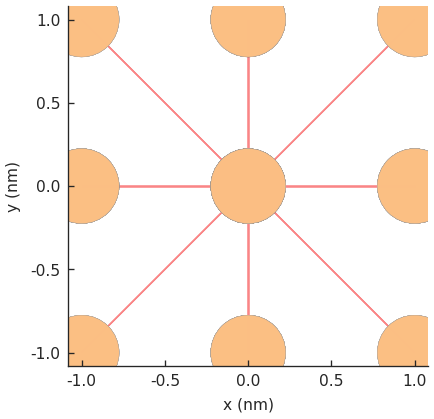

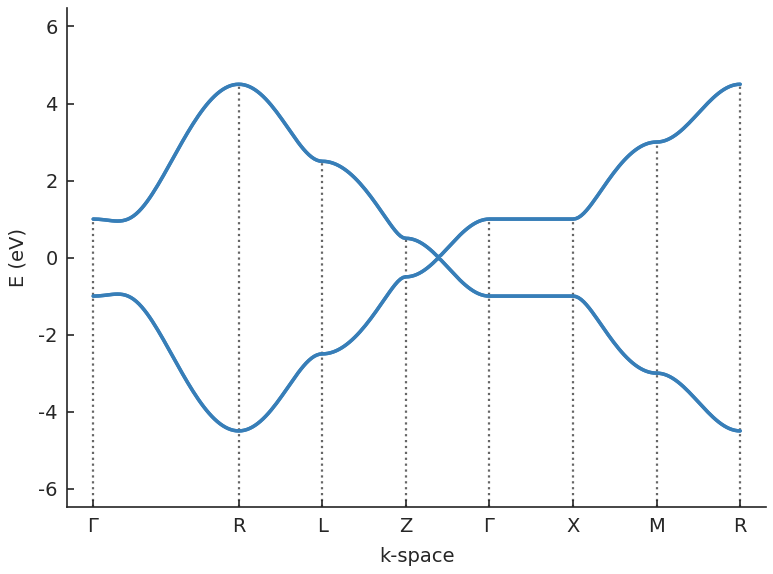

In [45]:
a = 1

m0 = 1.0
bxy = 1.0
bz = 0.75
g1 = 0.0
g2 = 0.0

lat = lei_lat(a, m0, bxy, bz, g1, g2)

model = pb.Model(lat, pb.translational_symmetry())

model.plot(axes='xy')

solver = pb.solver.lapack(model)

Gamma = [0, 0, 0]
R = [pi, pi, pi]
L = [pi, 0, pi]
Z = [0, 0, pi]
X = [pi, 0, 0]
M = [pi, pi, 0]

bands = solver.calc_bands(Gamma, R, L, Z, Gamma, X, M, R)

plt.figure(figsize=(4, 3), dpi=200)
bands.plot(point_labels=[r'$\Gamma$', 'R', 'L', 'Z', r'$\Gamma$', 'X', 'M', 'R'])
plt.tight_layout()
plt.show()

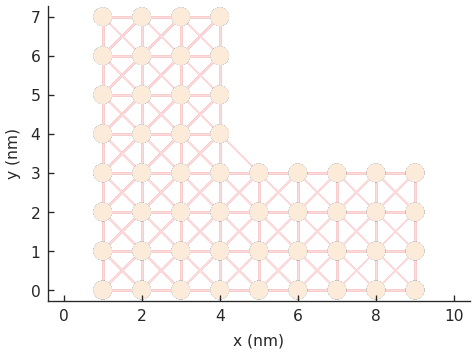

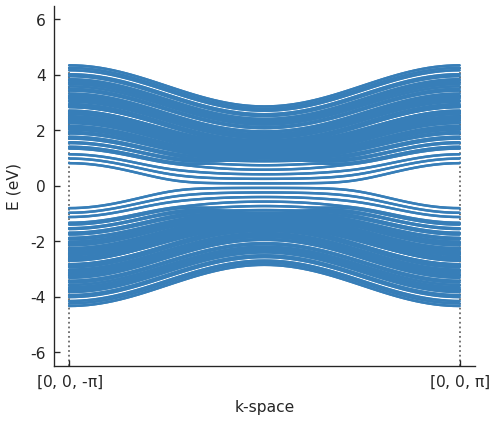

In [57]:
def minus_disclination(w):
    x0 = w
    y0 = w
    return pb.Polygon([[0, 0, 0], [w + 1, 0, 0], [w + 1, w / 2, 0], [w / 2, w / 2, 0], [w / 2, w, 0], [0, w, 0]])

model = pb.Model(
    lat,
    minus_disclination(8),
    pb.translational_symmetry(a1=False, a2=False, a3=True)
)

model.plot(num_periods=3, axes='xy')
plt.show()

solver = pb.solver.lapack(model)
bands = solver.calc_bands((0, 0, -pi), (0, 0, pi))
bands.plot()
plt.show()

In [ ]:
def connect_disclination():
    @pb.hopping_generator('cut', energy=0.1)  # eV
    def cut_generator(x, y, z):
        nx = np.max(x)
        ny = np.max(y)


        return row, col  # lists of site indices to connect
    return cut_generator